In [1]:
import pandas as pd
import pickle

In [ ]:
today = pd.Timestamp.today().strftime('%Y-%m-%d')

# Read the data

In [2]:
y = pd.read_excel('../data/CIC.xlsx', parse_dates=['date'], index_col='date')['CIC']
holiday_type = pd.read_excel('../data/holidays.xlsx', parse_dates=['date'], index_col='date')
holiday_type = pd.get_dummies(holiday_type['Type']).astype(int)
X = holiday_type.resample('B').last().fillna(0)

# Read the model

In [3]:
model = pickle.load(open('../model_output/CIC_forecast.pkl', 'rb'))

Importing plotly failed. Interactive plots will not work.


# Forecast

In [10]:
y_pred, y_pred_ints, preds, pred_ints = model.update(new_y=y, new_X=X,
                                                     mode='best_horizon',
                                                     ret_underlying=True)

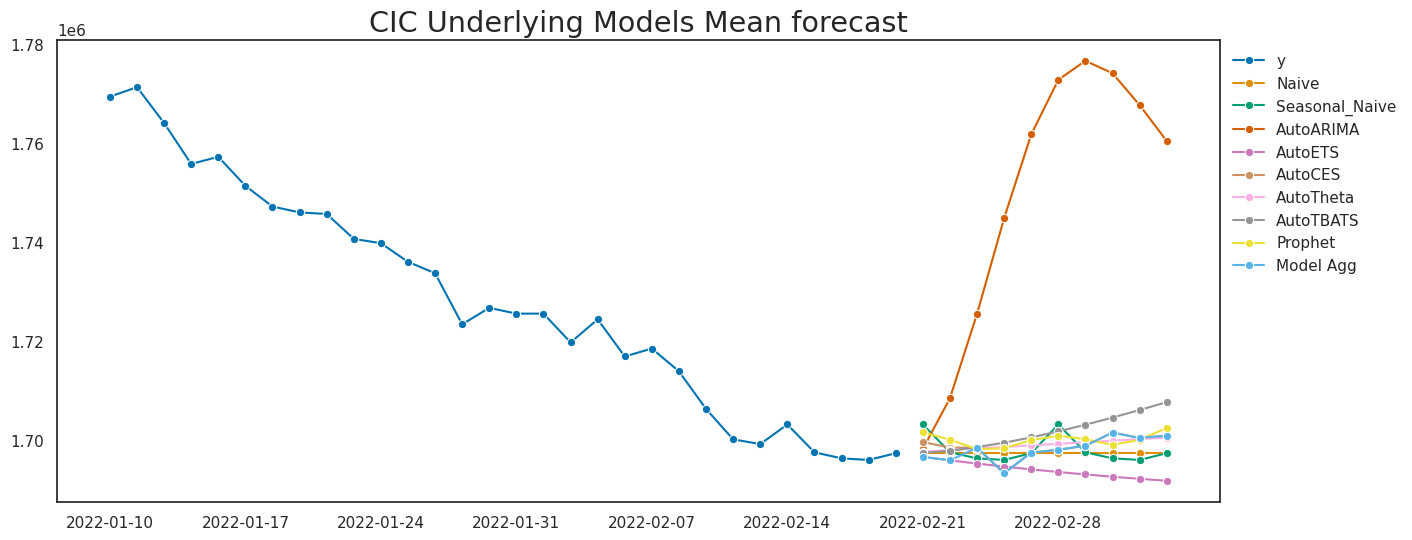

In [13]:
f, ax = model.plot_prediction(y_pred = y_pred,
                     models_preds = preds,
                     title = 'CIC Underlying Models Mean forecast',
                     y_pred_interval = None) 

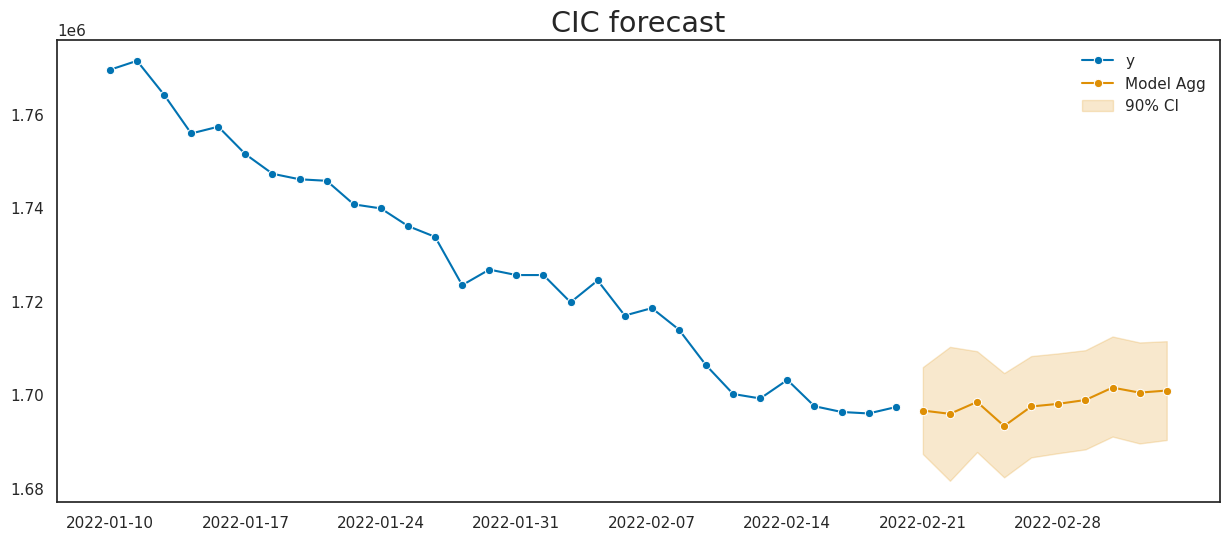

In [14]:
f, ax = model.plot_prediction(y_pred = y_pred,
                     models_preds = None,
                     title = 'CIC forecast',
                     y_pred_interval = y_pred_ints) 
f.savefig(f'forecast_output/CIC_forecast{today}.png')
f.show()

## Save forecast output

In [5]:
# output the predictions and prediction intervals from the model and the underlying model in excel sheet
with pd.ExcelWriter(f'forecast_output/CIC_prediction_{today}.xlsx') as writer:
    y_pred.rename('Model Agg').to_frame().to_excel(writer, sheet_name='mean_forecast', index=True)
    y_pred_ints.to_excel(writer, sheet_name='prediction_intervals', index=True)
    preds.to_excel(writer, sheet_name='underlying_models_forecasts', index=True)
    pred_ints.to_excel(writer, sheet_name='underlying_models_CI', index=True)